# CMSC 828L  
## Problem Set 1

#### Problem 1: Single input Neuron - Single output

#### *Neural Network:*

**Summary of Implementation**

The Network consists of a single input layer and a single output layer. The Network is programmed in the following manner:
The Class "Neural Network" handles all the functionalitlies related to the network which includes feedforward, cost estimation, backprop etc.. 

**Training Data:** The function *GenerateTestData()* Generates the required training data: input x and output y. 
For this particular network, The Training data is modelled by the function

$$y= 2x + 6 + \xi $$

where $\xi$ is a Gaussian Noise added to the data. The noise is added using Numpy's built in *random* method.

The output of Input neuron is given by 
$$a^0_1 = x_1 * w_1 + b_1 $$
where $a^0_1$ is the output of the Neuron, $x_1$ is the input, $w_1$ and $w_2$ are weights and biases respectively. These weights and biases are randomly initialized using numpy's random function

The Output is given by:
$$a^1_1 = \sum_{k=1}^d w_{1k}^0 a_k^0 + b_1^1$$

**Cost** Once the parameters are fed forward, the Cost function is calculated using Mean square differences. 
$\sum_{i=1}^n \frac{1}{2} (y_i - a_1^1(x_i))^2$

**Back Propagation** Differentiating this Cost function with respect to weights and biases, we obtain the rate of change of Weights and Biases (Gradients) responsible for the Error. 

$$ \frac{dC}{dW} = \sum X_i * (y - a_1^1)$$


Delta values of these Weights and biases are calculated, which are further used to tweak the and the actual weights, biases by a factor of *alpha* called the "Learning rate"

$Updated\_weights = Old\_weights + alpha * Delta\_Weights$


### Code 

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**Hyper Parameters**

In [37]:
NumOfIterations = 550
alpha = 0.0001
InputSampleSize = 50
TrainingSize = 45
TestSize = 15

In [69]:
NN_1D.input.shape[1]

1

In [38]:
class NeuralNetwork_1D:
    def __init__(self, x, y):
        self.input = x
        self.weights_1 = np.random.rand(self.input.shape[1],1)
        self.bias_1 = np.random.rand(1)
        self.y = y
        self.a1_out = np.zeros([self.input.shape[1],1])
        self.m = len(x)
        
    def Feedforward(self, X):
        self.a1_out = np.dot(X, self.weights_1) + self.bias_1
        return self.a1_out 
    
    def cost(self): #self.a, self.y
        C = (0.5/self.m) *sum((self.y - self.a1_out)**2)
        return C
    
    def CalcParameters(self):
        delta = self.y - self.a1_out
        dCdW = (1/self.m)* np.dot(self.input.T, delta)
        dCdb = (1/self.m)* np.sum(delta)
        return dCdW, dCdb
    
    def UpdateParameters(self, dCdW, dCdb, alpha):
        self.weights_1 = self.weights_1 + (alpha*dCdW)
        self.bias_1 = self.bias_1 + (alpha*dCdb)

In [39]:
def GenerateTestData(Size):
    x = np.linspace(0, 10, Size).reshape(Size, 1)
    y = np.zeros(Size).reshape(Size,1)
    for n in range(Size):
        y[n] = (2 * x[n]) + 6 + (np.random.randn())
    
    return x,y

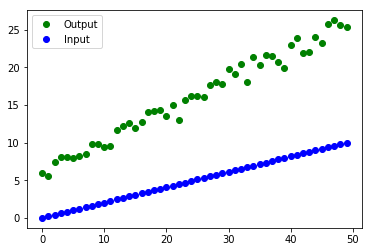

In [40]:
x, y = GenerateTestData(InputSampleSize)
plot(y, 'o', picker = 2, color = "green")
plot(x,'o', picker =2, color = "blue")
legend(['Output','Input'])

**Initialization and Training**

In [41]:
NN_1D = NeuralNetwork_1D(x, y)

In [42]:
Output1 = NN_1D.Feedforward(x)

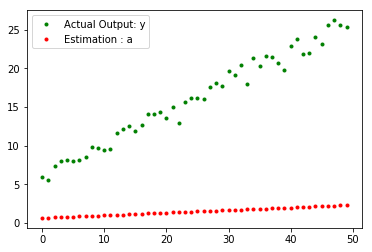

In [43]:
plot(y, '.', picker = 0.2, color = "green")
plot(Output1, '.', color = "red")
legend(['Actual Output: y', 'Estimation : a'])

In [44]:
cost = NN_1D.cost()
print("Initial cost = " + str(cost))

Initial cost = 121.02726908852691


**Back propogating the Error**

In [45]:
CostTracker = np.zeros(NumOfIterations)

for i in range(NumOfIterations):
    dW, dB = NN_1D.CalcParameters()
    NN_1D.UpdateParameters(dW, dB, alpha)
    Output_new = NN_1D.Feedforward(x)
    CostTracker[i] = NN_1D.cost()


In [46]:
NN_1D.weights_1.shape

(1, 1)

**Cost Curve**

Text(0.5,1,'Cost Vs Number of Iterations')

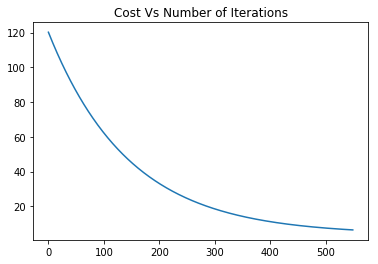

In [47]:
plot(CostTracker)
title("Cost Vs Number of Iterations")

Text(0.5,1,'Comparision of Actual Output and Function approximated by Network')

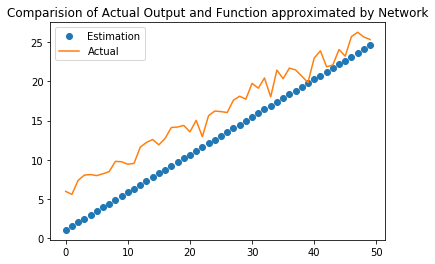

In [48]:
plot(Output_new, 'o')
plot(y)
legend(["Estimation", "Actual"])
title("Comparision of Actual Output and Function approximated by Network")

In [49]:
print("Final Cost after Training = " + str(CostTracker[NumOfIterations - 1]))

Final Cost after Training = 6.349093748971281


**Testing**

I've tested the neural network by taking samples from a different range of values ie The input values were taken in the range from $x = (0,10)$ for testing, The values of input are selected from a range of x = (5,15) at random intervals. (Contrary to uniform intervals during training.
P.S.  Note that this time, we aren't adding any gaussian noise to the output.

In [50]:
def GenerateTestData(TestSize):
    Test_inp = (15-5) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 5
    Test_Out = np.zeros(TestSize).reshape(TestSize,1)
    for n in range(TestSize):
        Test_Out[n] = (2 * Test_inp[n]) + 6
    return Test_inp,Test_Out

In [51]:
Test_inp,Test_Out = GenerateTestData(TestSize)

In [52]:
Test_Output_NN_1D = NN_1D.Feedforward(Test_inp)

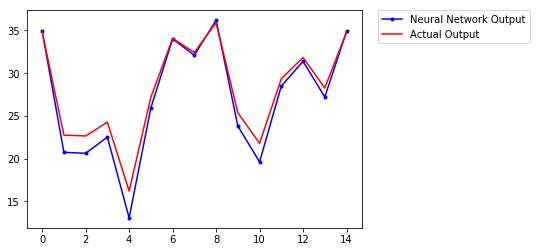

In [53]:
plt.plot(Test_Output_NN_1D[:,0], marker='.', color = "blue", label = "Neural Network Output")
plot(Test_Out, color = "Red", label = "Actual Output")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [54]:
Error = ()

### Observations

### 2D input

In [55]:
def Generate_2D_TestData(Size):
    x1 = np.linspace(0, 15, Size).reshape(Size, 1)
    x2 = np.linspace(0.10,0.8, Size).reshape(Size, 1)
    x = np.concatenate((x1,x2), axis=1)
    y = np.zeros(Size).reshape(Size,1)
    for n in range(Size):
        y[n] = (0.3 * x1[n]) - (2 * x2[n]) + 13 + (np.random.randn())
    plot(x1)
    plot(x2)
    plot(y)
    legend(["X1", "X2", "Y"])
    return x,y

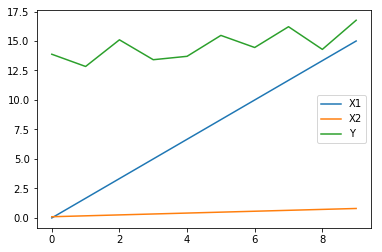

In [56]:
x,y = Generate_2D_TestData(10)

In [57]:
NN2 = NeuralNetwork_1D(x,y)

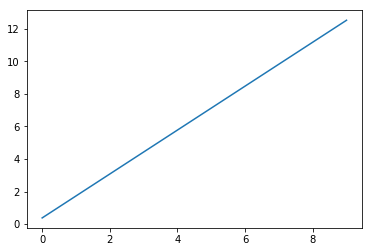

In [58]:
Output = NN2.Feedforward(x)
plot(Output)

In [59]:
Cost_2 = NN2.cost()
print(Cost_2)

38.40516989469481


In [60]:
CostTracker2 = np.zeros(NumOfIterations)

for i in range(NumOfIterations):
    dW_2, dB_2 = NN2.CalcParameters()
    NN2.UpdateParameters(dW_2, dB_2, alpha)
    Output2_new = NN2.Feedforward(x)
    CostTracker2[i] = NN2.cost()


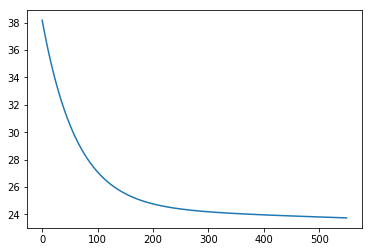

In [61]:
plot(CostTracker2)

In [62]:
print("Final Cost = " + str(CostTracker2[NumOfIterations -1]))

Final Cost = 23.739217744726787


**Testing**

In [63]:
def Generate2DTestData(TestSize):
    Test_inp_1 = (2.5-4.5) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 4.5
    Test_inp_2 = (8-3) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 3
    Test_inp = np.concatenate((Test_inp_1, Test_inp_2), axis=1)
    Test_Out = np.zeros(TestSize).reshape(TestSize,1)
    for n in range(TestSize):
        Test_Out[n] = (0.3 * Test_inp_1[n]) - (2 * Test_inp_2[n]) + 13
    plot(Test_inp_1)
    plot(Test_inp_2)
    title("Input x1,x2")
    figure()
    plot(Test_Out)
    title("Test Data Output y")
    return Test_inp,Test_Out

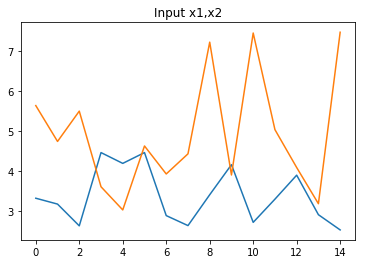

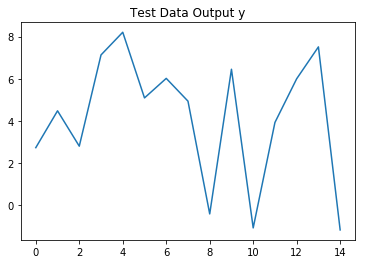

In [64]:
x, y = Generate2DTestData(TestSize)

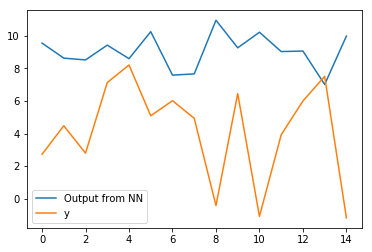

In [65]:
Output = NN2.Feedforward(x)
plot(Output)
plot(y)
legend(["Output from NN","y"])

In [66]:
Error = np.sum((y - Output)**2)/TestSize
print("Error = " + str(Error))

Error = 37.580928903433694
